In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive"

'Colab Notebooks'   Data   plant_disease.h5


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers import Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

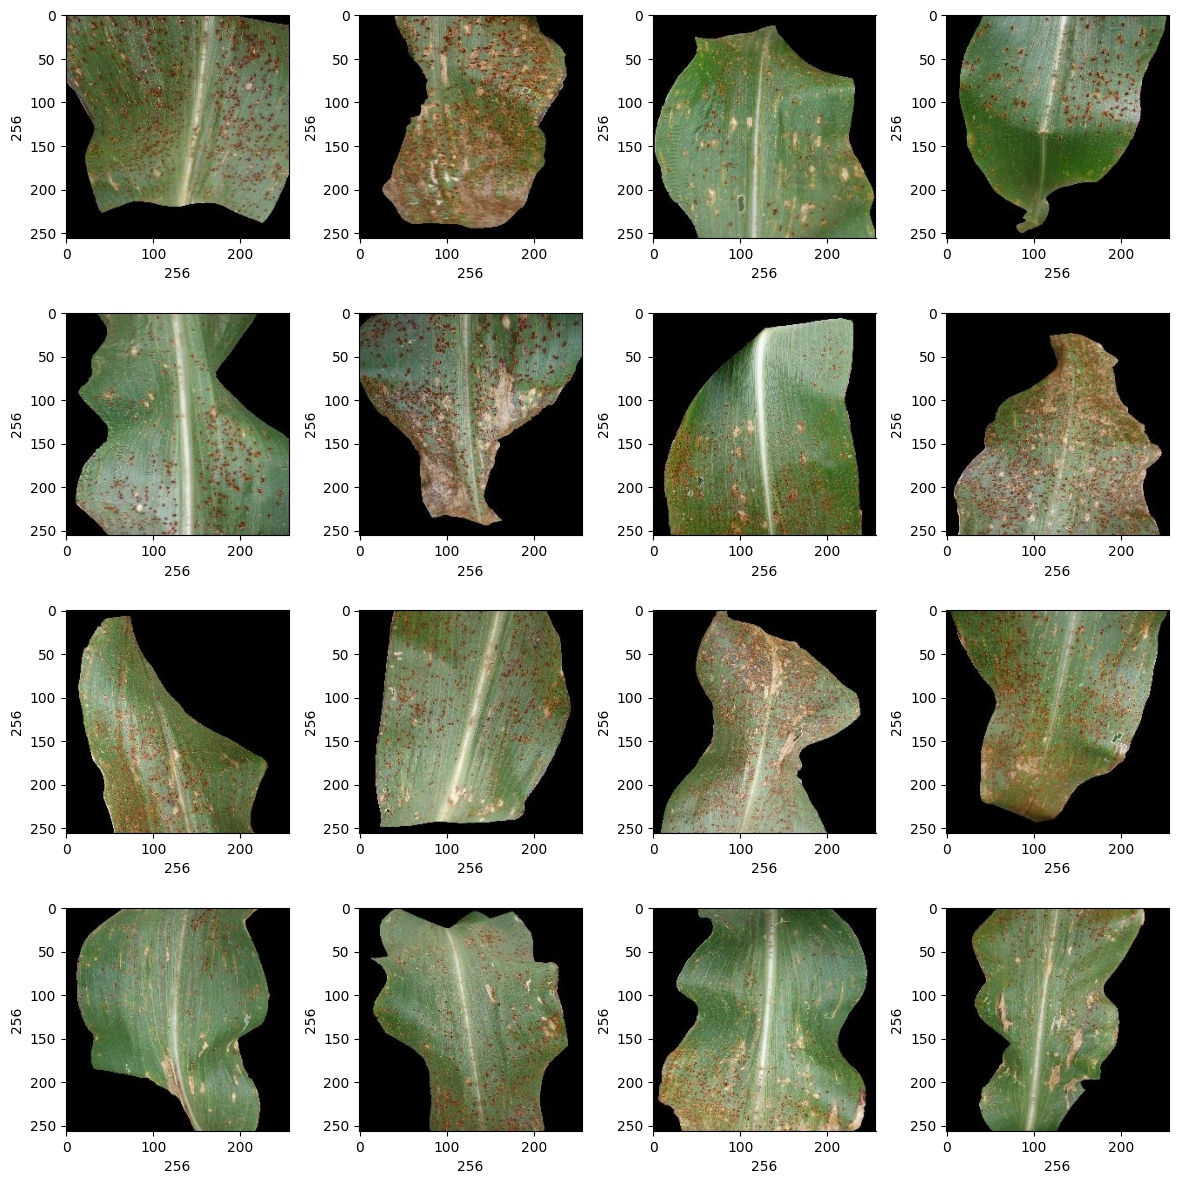

In [4]:
# Plotting images
plt.figure(figsize=(12, 12))
path = "/content/drive/MyDrive/Data/Corn_(maize)___Common_rust_"
for k in range(1, 17):
  plt.subplot(4, 4, k)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

In [5]:
# Converting Images to array
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, (256, 256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None

In [6]:
dir = "/content/drive/MyDrive/Data"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ["Corn-Common_rust", "Potato-Early_blight", "Tomato-Bacterial_spot"]
binary_labels = [0, 1, 2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  print(directory)
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

Corn_(maize)___Common_rust_
Tomato___Bacterial_spot
Potato___Early_blight


In [7]:
# Class count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [8]:
image_list[0].shape

(256, 256, 3)

In [9]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, train_size=0.8, random_state=10)

In [11]:
len(x_train), len(x_test)

(720, 180)

In [12]:
# Normalizing the data
x_train = np.array(x_train, dtype=np.float32) / 255.0
x_test = np.array(x_test, dtype=np.float32) / 255.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

In [13]:
x_train[0]

array([[[0.7921569 , 0.65882355, 0.68235296],
        [0.7647059 , 0.64705884, 0.6666667 ],
        [0.7882353 , 0.6901961 , 0.7058824 ],
        ...,
        [0.57254905, 0.49803922, 0.50980395],
        [0.59607846, 0.52156866, 0.53333336],
        [0.5058824 , 0.43137255, 0.44313726]],

       [[0.84705883, 0.72156864, 0.7411765 ],
        [0.81960785, 0.7019608 , 0.72156864],
        [0.8039216 , 0.7137255 , 0.7294118 ],
        ...,
        [0.6117647 , 0.5372549 , 0.54901963],
        [0.59607846, 0.52156866, 0.53333336],
        [0.5372549 , 0.4627451 , 0.4745098 ]],

       [[0.78431374, 0.6784314 , 0.69411767],
        [0.7607843 , 0.6627451 , 0.6784314 ],
        [0.73333335, 0.6509804 , 0.6627451 ],
        ...,
        [0.6       , 0.5254902 , 0.5372549 ],
        [0.60784316, 0.53333336, 0.54509807],
        [0.6156863 , 0.5411765 , 0.5529412 ]],

       ...,

       [[0.7176471 , 0.654902  , 0.65882355],
        [0.6862745 , 0.62352943, 0.627451  ],
        [0.7019608 , 0

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
def neural_net():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(3, 3)))
  model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(64, activation="relu"))
  model.add(Dense(3, activation="softmax"))
  model.summary()
  return model


In [16]:
S_Net = neural_net()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 112896)            0         
                                                                 
 dense (Dense)               (None, 64)                7

In [17]:
S_Net.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001), metrics=["accuracy"])

In [18]:
# Splitting the training data into training and validation data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [19]:
# training the neural net
epochs = 50
batch_size = 128
history = S_Net.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(x_val, y_val))

Epoch 1/50
5/5 [==============================] - 51s 9s/step - loss: 1.0211 - accuracy: 0.4601 - val_loss: 0.7660 - val_accuracy: 0.5347
Epoch 2/50
5/5 [==============================] - 45s 9s/step - loss: 0.6142 - accuracy: 0.7674 - val_loss: 0.4147 - val_accuracy: 0.9375
Epoch 3/50
5/5 [==============================] - 43s 9s/step - loss: 0.3689 - accuracy: 0.9306 - val_loss: 0.2647 - val_accuracy: 0.9444
Epoch 4/50
5/5 [==============================] - 46s 9s/step - loss: 0.2243 - accuracy: 0.9688 - val_loss: 0.2071 - val_accuracy: 0.9375
Epoch 5/50
5/5 [==============================] - 50s 10s/step - loss: 0.1633 - accuracy: 0.9583 - val_loss: 0.1353 - val_accuracy: 0.9514
Epoch 6/50
5/5 [==============================] - 57s 12s/step - loss: 0.1141 - accuracy: 0.9688 - val_loss: 0.1211 - val_accuracy: 0.9653
Epoch 7/50
5/5 [==============================] - 83s 14s/step - loss: 0.0970 - accuracy: 0.9809 - val_loss: 0.1104 - val_accuracy: 0.9583
Epoch 8/50
5/5 [===============

In [20]:
S_Net.save("/content/drive/MyDrive/plant_disease.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


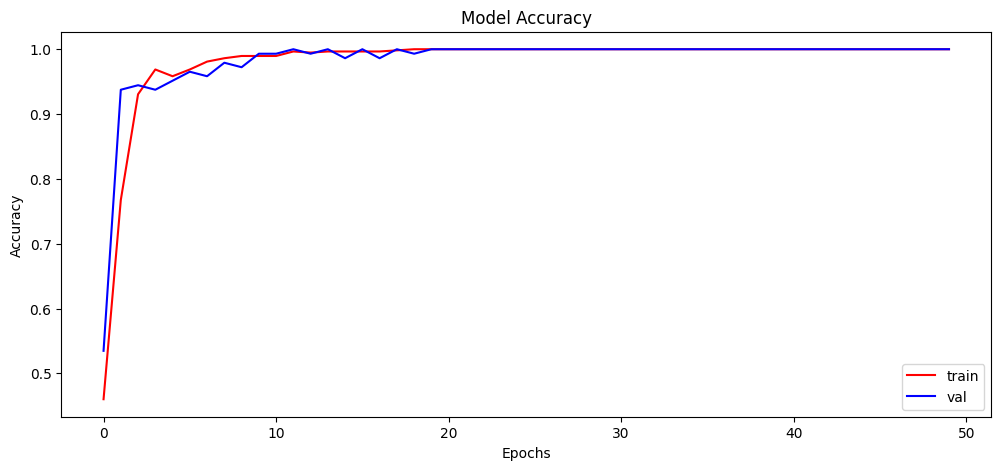

In [21]:
# PLot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history["accuracy"], color="r")
plt.plot(history.history["val_accuracy"], color="b")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

In [22]:
print("[NFO] Calculating model accuracy")
scores = S_Net.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[NFO] Calculating model accuracy
6/6 [==============================] - 5s 762ms/step - loss: 0.0486 - accuracy: 0.9833
Test Accuracy: 98.33333492279053


In [23]:
y_pred = S_Net.predict(x_test)

6/6 [==============================] - 4s 714ms/step


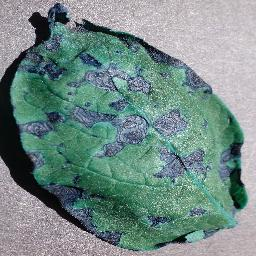

In [28]:
# Plotting image to compare
img = array_to_img(x_test[12])
img

In [29]:
print("Original: ", all_labels[np.argmax(y_test[12])])
print("Predicted: ", all_labels[np.argmax(y_pred[12])])

Original:  Tomato-Bacterial_spot
Predicted:  Tomato-Bacterial_spot
